In [ ]:
# You will do the following tasks;

# Data Exploration and Visualization
# Include at least one univariate and multivariate visualization and do not forget to make interpretations.
# Machine learning
# Data cleaning
# Modelling and Evaluation
# Use at least one classical ML model and a neural network.
# Findings and presentation
# Make presentation (max 5 slides to summarize your findings from this task)


In [ ]:
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import StandardScaler;
import pandas as pd;

In [ ]:
#load data
email_data = pd.read_csv('./sample_data/phis_email.csv')
email_data.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
#check for nulls
print(f'data info: {email_data.info()}');
print(f'\n duplicate rows: {email_data.duplicated().sum()}');

print(f'\n checking for null rows: {email_data.isnull().sum()}');


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB
data info: None

 duplicate rows: 0

 checking for null rows: Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64


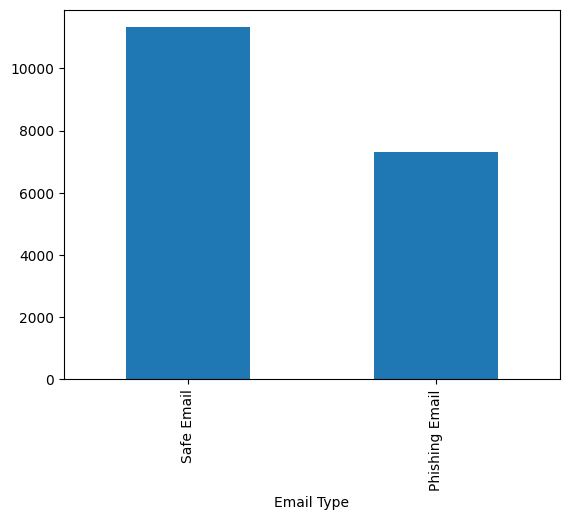

In [ ]:
#check  the email type distribution
email_data['Email Type'].value_counts().plot(kind='bar');

In [ ]:
email_data.drop(columns=['Unnamed: 0'], inplace=True);



In [ ]:
email_data.columns
email_data.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:

#use 1 for safe email and 0 for Phising email
email_data['Email Type'] = email_data['Email Type'].replace(['Safe Email','Phishing Email'],[1,0])
email_data['Email Type']

<ipython-input-137-eef75ded266e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  email_data['Email Type'] = email_data['Email Type'].replace(['Safe Email','Phishing Email'],[1,0])


,Email Type
0,1
1,1
2,1
3,0
4,0
...,...
18645,0
18646,1
18647,1
18648,1


In [ ]:
#Univariate visualisations

In [ ]:
from wordcloud import WordCloud
phishing_emails = email_data[email_data['Email Type'] == 0]
non_phishing_emails = email_data[email_data['Email Type'] == 1]


# Check for NaN values
print(phishing_emails['Email Text'].isnull().sum())
phishing_emails.loc[:, 'Email Text'] = phishing_emails['Email Text'].astype(str).fillna('')



16


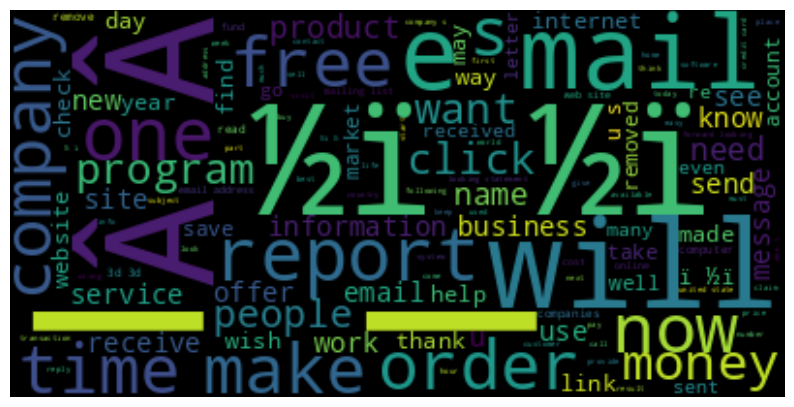

In [ ]:
import matplotlib.pyplot as plt

# Generate WordCloud for phishing emails
wordcloud = WordCloud().generate(' '.join(phishing_emails['Email Text']))

# Display the WordCloud
plt.figure(figsize=(10, 6))  # Set figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Display the generated WordCloud
plt.axis('off')  # Turn off the axis
plt.show()

In [ ]:
wordcloud.to_file('./sample_data/phishing_wordcloud.png')

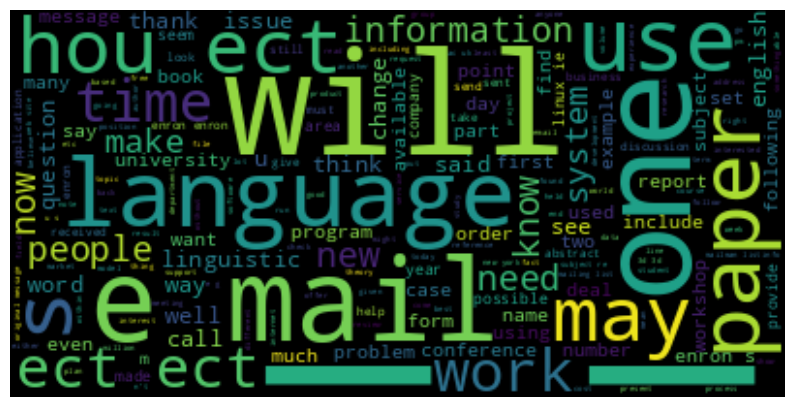

In [ ]:
# Generate WordCloud for non-phishing emails
non_phishing_wordcloud = WordCloud().generate(' '.join(non_phishing_emails['Email Text']))

# Display the WordCloud for non-phishing emails
plt.figure(figsize=(10, 6))
plt.imshow(non_phishing_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
wordcloud.to_file('./sample_data/safe_emails_wordcloud.png')

phising emails tend to have the words: click, money, need, want ,company among others



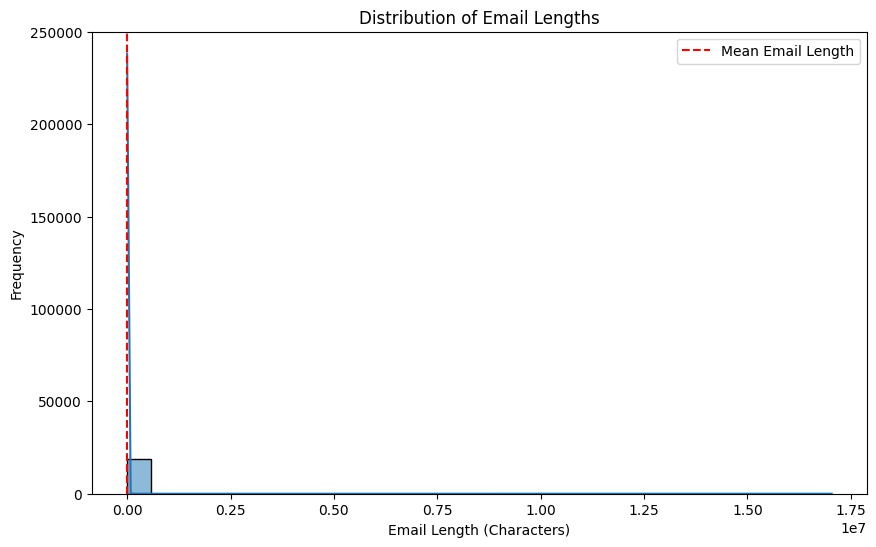

In [ ]:
#Univariate visualisation

import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Visualization: Histogram of Email Length
plt.figure(figsize=(10, 6))
sns.histplot(email_data['email_length'], bins=30, kde=True)  # KDE for smoothness
plt.title('Distribution of Email Lengths')
plt.xlabel('Email Length (Characters)')
plt.ylabel('Frequency')
plt.axvline(x=email_data['email_length'].mean(), color='red', linestyle='--', label='Mean Email Length')
plt.legend()
plt.show()


In [ ]:


# multivariate visualisations

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


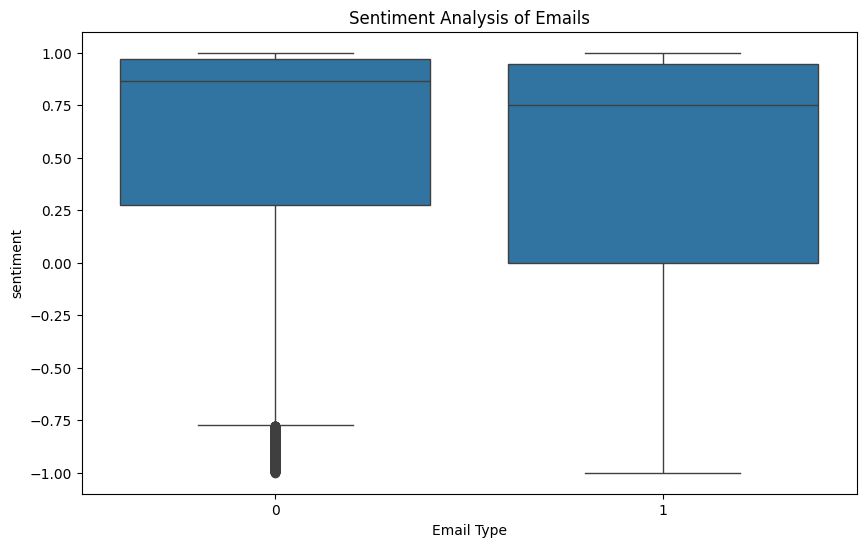

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

email_data['Email Text'] = email_data['Email Text'].astype(str).fillna('')
# Apply sentiment analysis to 'Email Text'
email_data['sentiment'] = email_data['Email Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Visualize sentiment by Email Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Email Type', y='sentiment', data=email_data)
plt.title('Sentiment Analysis of Emails')
plt.show()

In [ ]:
# email_data['text_length'] = email_data['Email Text'].apply(len)
# email_data['text_length'].hist(bins=50)

# Calculate email length
email_data['email_length'] = email_data['Email Text'].apply(lambda x: len(str(x)))

In [ ]:
# Include at least one univariate and multivariate visualization and do not forget to make interpretations.

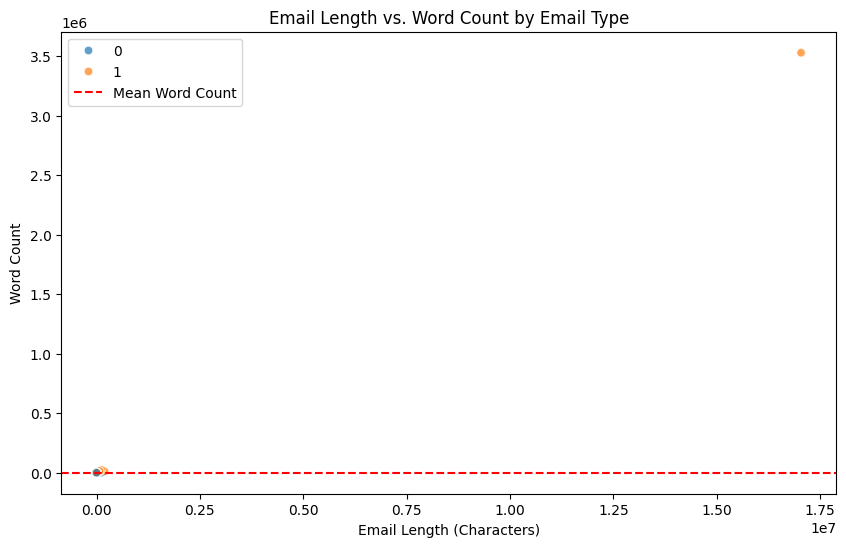

In [ ]:
# Multivariate Visualization: Email Length vs. Word Count

email_data['word_count'] = email_data['Email Text'].apply(lambda x: len(str(x).split()))


plt.figure(figsize=(10, 6))
sns.scatterplot(x='email_length', y='word_count', hue='Email Type', data=email_data, alpha=0.7)
plt.title('Email Length vs. Word Count by Email Type')
plt.xlabel('Email Length (Characters)')
plt.ylabel('Word Count')
plt.axhline(y=email_data['word_count'].mean(), color='red', linestyle='--', label='Mean Word Count')
plt.legend()
plt.show()


**Deductions from univariate visualisation:**
phishing emails tend to have the words: click, money, need, want ,company among others

**Deductions from multivariate visualisation:**
Word Count: Safe emails have more word count compared to Phishing emails
Variability: Phishing emails show more variability in sentiment, with a larger spread, while same Emails are more consistent and positive.


Deductions from multivariate visualisation:

Phising emails tend to have a low word count unlike safe emails which have a higher word count and email length


NB: 1 is safe , 0 is phishing email

In [ ]:
#preprocessing

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import LabelEncoder

# Prepare features and labels
X = email_data['Email Text']
y = email_data['Email Type']


# le = LabelEncoder()
# y = le.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
tfidf = TfidfVectorizer(max_features=5000)  # Limit to the top 5000 words
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()


In [ ]:
# Classical ML Model: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1457
           1       0.97      0.97      0.97      2273

    accuracy                           0.96      3730
   macro avg       0.96      0.96      0.96      3730
weighted avg       0.96      0.96      0.96      3730

Confusion Matrix:
[[1394   63]
 [  72 2201]]


In [ ]:
# Neural Network: Feedforward Neural Network

import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# from tensorflow.keras import Sequential
# from tensorflow.keras import metrics


# Create the neural network model
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
nn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_nn = (nn_model.predict(X_test_tfidf) > 0.5).astype("int32")

# Evaluate the model
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8662 - loss: 0.2879 - val_accuracy: 0.9682 - val_loss: 0.0787
Epoch 2/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9847 - loss: 0.0335 - val_accuracy: 0.9668 - val_loss: 0.0802
Epoch 3/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9880 - loss: 0.0255 - val_accuracy: 0.9688 - val_loss: 0.0852
Epoch 4/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9892 - loss: 0.0218 - val_accuracy: 0.9601 - val_loss: 0.0902
Epoch 5/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9869 - loss: 0.0211 - val_accuracy: 0.9692 - val_loss: 0.0927
Epoch 6/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9880 - loss: 0.0221 - val_accuracy: 0.9688 - val_loss: 0.0946
Epoch 7/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9888 - loss: 0.0210 - val_accuracy: 0.9682 - val_loss: 0.0978
Epoch 8/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9903 - loss: 0.0183 - val_a

Evaluations of the machine learning models

Neural Network outperforms Logistic Regression in both precision and recall, leading to a slightly higher overall accuracy (97% vs. 96%).

The Neural Network makes fewer errors overall (fewer false positives and false negatives).
